## Import Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "https://raw.githubusercontent.com/ElliotRoosevelt/DS4002Project2/refs/heads/main/Data/RichmondCioInequality.csv"
COI_df = pd.read_csv(file_path)

COI_df.info() 
COI_df.head()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census_FIP_Code              3288 non-null   int64  
 1   Year                         3288 non-null   int64  
 2   NativeAmerican_AlaskaNative  3288 non-null   float64
 3   Asian                        3288 non-null   float64
 4   Black_AfricanAmerican        3288 non-null   float64
 5   Hispanic                     3288 non-null   float64
 6   White                        3288 non-null   float64
 7   TotalNumberChildren          3288 non-null   float64
 8   county_name                  3288 non-null   object 
 9   metro_name                   3288 non-null   object 
 10  COI_Level_Metro              3288 non-null   object 
 11  COI_Scores_Metro             3288 non-null   int64  
 12  Education_Level_Metro        3288 non-null   object 
 13  Education_Score_Me

,Census_FIP_Code,Year,NativeAmerican_AlaskaNative,Asian,Black_AfricanAmerican,Hispanic,White,TotalNumberChildren,county_name,metro_name,COI_Level_Metro,COI_Scores_Metro,Education_Level_Metro,Education_Score_Metro,HealthEnviro_Level_Metro,HealthEnviro_Score_Metro,SocialEconomic_Level_Metro,SocialEconomic_Score_Metro
0,51007930101,2012,0.000000,6.520973,161.212956,7.607802,353.581674,528.923406,"Amelia County, Virginia","Richmond, VA",Low,22,Low,37,Very Low,1,Low,30.0
1,51007930101,2013,0.000000,0.000000,153.527634,9.776524,350.868578,514.172735,"Amelia County, Virginia","Richmond, VA",Low,24,Low,36,Very Low,4,Low,30.0
2,51007930101,2014,0.000000,0.000000,132.573345,19.613591,333.067828,487.070838,"Amelia County, Virginia","Richmond, VA",Low,24,Moderate,41,Very Low,3,Low,30.0
3,51007930101,2015,3.656702,0.000000,151.753144,31.813310,432.222208,668.445175,"Amelia County, Virginia","Richmond, VA",Low,24,Moderate,48,Very Low,3,Low,27.0
4,51007930101,2016,15.831146,0.000000,130.698993,30.189627,397.251306,637.663821,"Amelia County, Virginia","Richmond, VA",Low,26,Moderate,55,Very Low,4,Low,28.0


## Correlation Heatmap

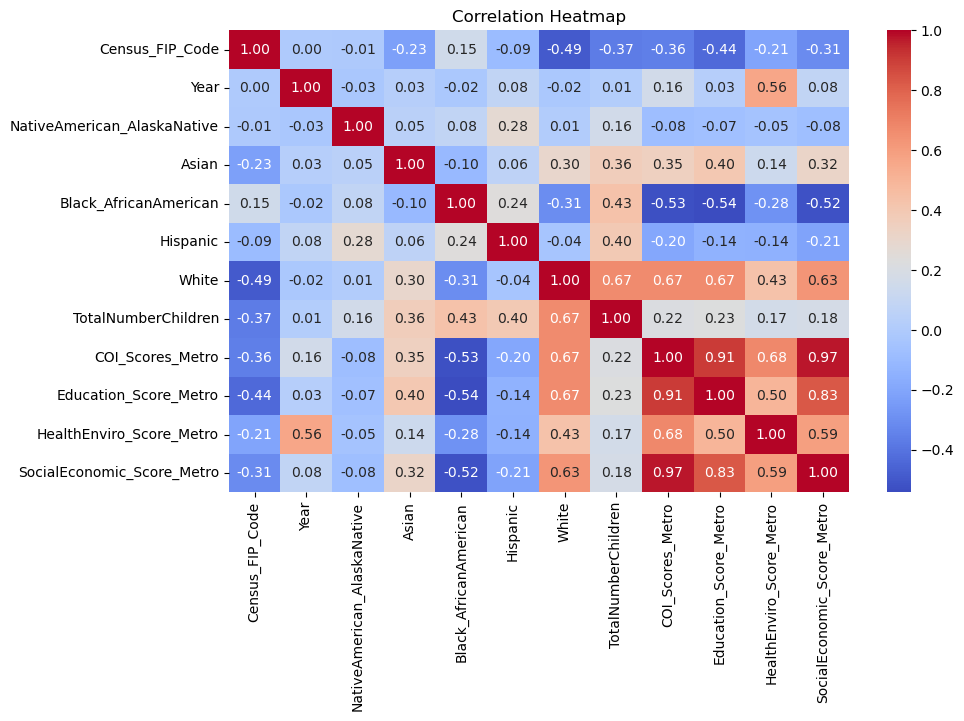

In [6]:
numeric_df = COI_df.select_dtypes(include=["number"])   # Select only numeric columns

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

## Cross-tabulation

county_name       Amelia County, Virginia  Charles City County, Virginia  \
COI_Scores_Metro                                                           
1                                       0                              0   
2                                       0                              0   
3                                       0                              0   
4                                       0                              0   
5                                       0                              0   
...                                   ...                            ...   
96                                      0                              0   
97                                      0                              0   
98                                      0                              0   
99                                      0                              0   
100                                     0                              0   

county_name

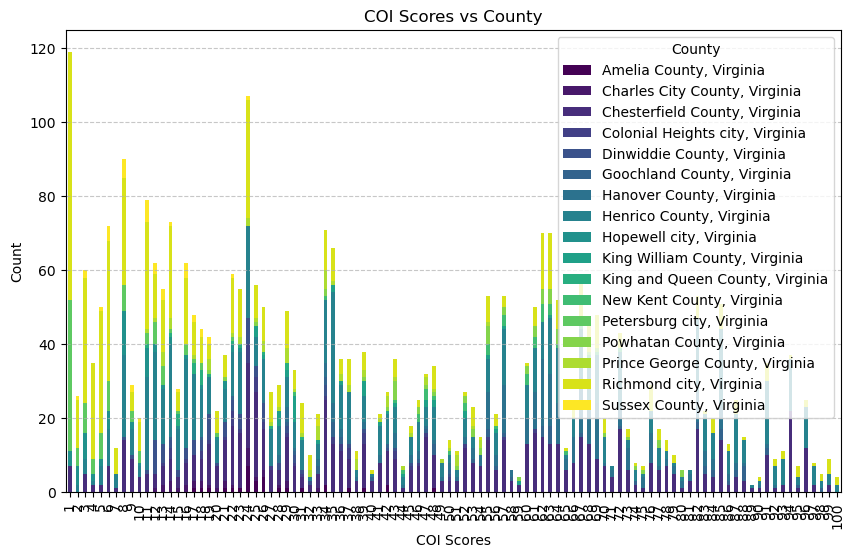

In [8]:
# Cross-tabulation of COI scores and County
COI_by_county = pd.crosstab(COI_df['COI_Scores_Metro'], COI_df['county_name'])
print(COI_by_county)

# Visualize cross-tabulation
COI_by_county.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("COI Scores vs County")
plt.xlabel("COI Scores")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.legend(title="County")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Boxplot

<Axes: xlabel='Year', ylabel='COI_Scores_Metro'>

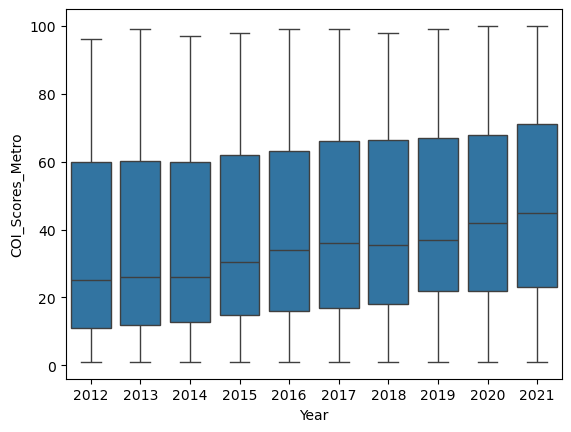

In [10]:
sns.boxplot(data=COI_df, x="Year", y="COI_Scores_Metro")

## Pivot Table

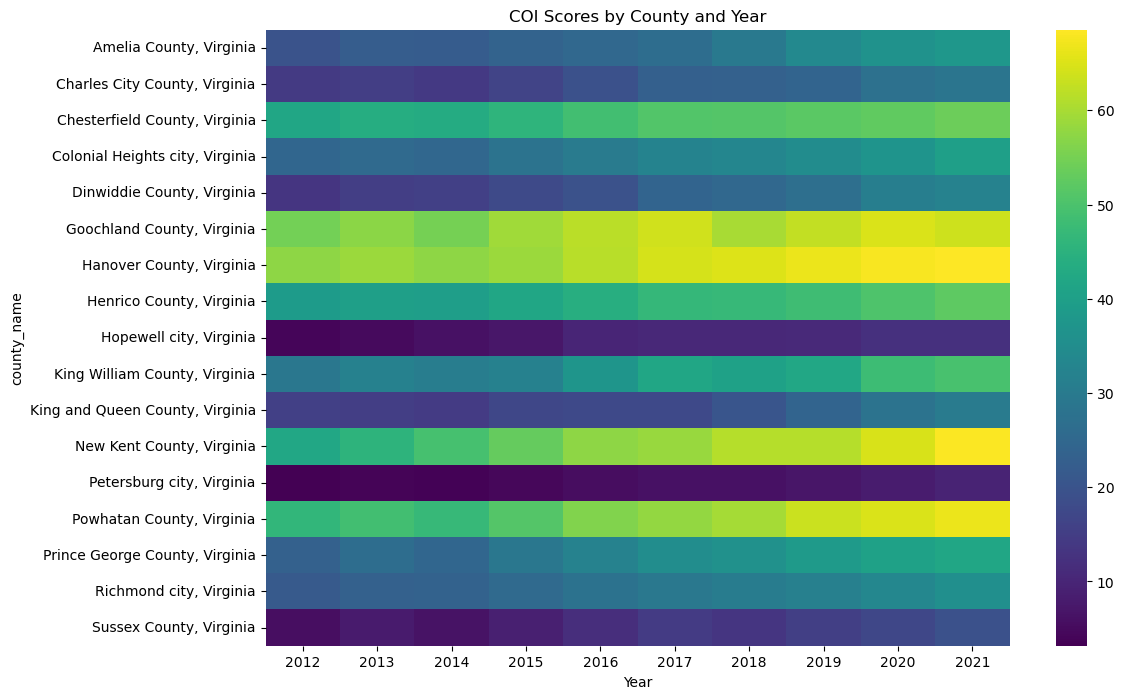

In [12]:
COI_df.groupby(["county_name", "Year"]).size().sort_values(ascending=False).head(10)
COI_df_agg = COI_df.groupby(["county_name", "Year"], as_index=False)["COI_Scores_Metro"].mean()
COI_df_pivot = COI_df.pivot_table(
    index="county_name",
    columns="Year",
    values="COI_Scores_Metro",
    aggfunc="mean"  # or "median", "sum", etc.
)
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(COI_df_pivot, cmap="viridis")
plt.title("COI Scores by County and Year")
plt.show()

## Multiple Linear Regression

                            OLS Regression Results                            
Dep. Variable:       COI_Scores_Metro   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.070e+04
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:13:23   Log-Likelihood:                -7235.8
No. Observations:                2958   AIC:                         1.448e+04
Df Residuals:                    2953   BIC:                         1.451e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

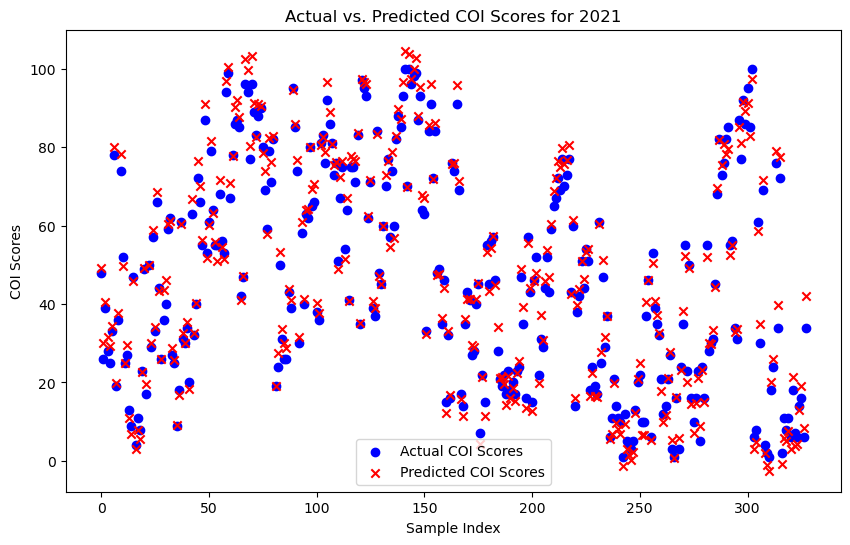

In [56]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Drop rows with missing values in any of the required columns
required_columns = ['Year', 'White', 'Education_Score_Metro', 'HealthEnviro_Score_Metro', 'SocialEconomic_Score_Metro', 'COI_Scores_Metro']
COI_df_clean = COI_df.dropna(subset=required_columns)

# Step 1: Filter the data
# Training data: all records from 2012 to 2020
train_df = COI_df_clean[COI_df_clean['Year'] < 2021]

# Test data: records from 2021
test_df = COI_df_clean[COI_df_clean['Year'] == 2021]

# Step 2: Define features and target variable
features = ['White', 'Education_Score_Metro', 'HealthEnviro_Score_Metro', 'SocialEconomic_Score_Metro']
target = 'COI_Scores_Metro'

# Extract the feature matrix (X) and target vector (y) for training
X_train = train_df[features]
y_train = train_df[target]

# Extract the feature matrix and target vector for the 2021 test set
X_test = test_df[features]
y_test = test_df[target]

# Step 3: Fit the Multiple Regression Model using statsmodels
# Add a constant term to include an intercept in the model
X_train_sm = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) regression model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print the summary which includes:
print(model_sm.summary())

# Step 5: Use the Model to Predict 2021 COI Scores
# Add constant to test features as well
X_test_sm = sm.add_constant(X_test)
y_pred_sm = model_sm.predict(X_test_sm)

# Step 6: Evaluate the Model on the 2021 Data
mse = mean_squared_error(y_test, y_pred_sm)
r2 = r2_score(y_test, y_pred_sm)

print("\nMean Squared Error on 2021 data:", mse)
print("R-squared on 2021 data:", r2)

# Step 7: Compare Actual vs Predicted Values for 2021
comparison_df = test_df[['Year', target]].copy()
comparison_df['Predicted_COI_Scores'] = y_pred_sm
comparison_df['Prediction_Error'] = comparison_df['Predicted_COI_Scores'] - comparison_df[target]

print("\nComparison of Actual and Predicted COI Scores for 2021:")
print(comparison_df)

# Step 8: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual COI Scores')
plt.scatter(range(len(y_pred_sm)), y_pred_sm, color='red', marker='x', label='Predicted COI Scores')
plt.title('Actual vs. Predicted COI Scores for 2021')
plt.xlabel('Sample Index')
plt.ylabel('COI Scores')
plt.legend()
plt.show()